### Will the current factory capacity be sufficient to meet the future demand from the four continental markets?
#### The notebook explores the question.

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [151]:
df = pd.read_excel('SCG_Demand.xlsx')

In [152]:
display_side_by_side(df.head(), df.tail())

,day,Calopeia,Sorange,Tyran,Entworpe,Fardo
0,1,11,0,0,0,0
1,2,7,0,0,0,0
2,3,4,0,0,0,0
3,4,8,0,0,0,0
4,5,5,0,0,0,0
,day,Calopeia,Sorange,Tyran,Entworpe,Fardo
1025,1026,15,65,16,0,5
1026,1027,23,70,22,0,16
1027,1028,29,68,2,0,0
1028,1029,28,72,4,0,9


In [153]:
df.Calopeia.describe()

count    1030.000000
mean       40.690291
std        26.347314
min         1.000000
25%        18.000000
50%        39.000000
75%        58.750000
max       133.000000
Name: Calopeia, dtype: float64

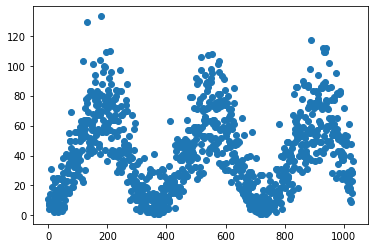

In [154]:
plt.scatter(df.day, df.Calopeia)

In [155]:
df_3c = df.iloc[639:]
df_3c = df_3c.drop(['Calopeia', 'Fardo'], axis=1)

In [156]:
display_side_by_side(df_3c.head(), df_3c.tail())

,day,Sorange,Tyran,Entworpe
639,640,17,5,0
640,641,0,0,0
641,642,0,0,0
642,643,0,0,0
643,644,6,0,0
,day,Sorange,Tyran,Entworpe
1025,1026,65,16,0
1026,1027,70,22,0
1027,1028,68,2,0
1028,1029,72,4,0


In [157]:
df_3c.describe()

,day,Sorange,Tyran,Entworpe
count,391.000000,391.000000,391.000000,391.000000
mean,835.000000,31.468031,16.429668,15.345269
std,113.016223,23.496718,15.522012,60.083881
min,640.000000,0.000000,0.000000,0.000000
25%,737.500000,11.500000,4.000000,0.000000
50%,835.000000,29.000000,11.000000,0.000000
75%,932.500000,46.000000,25.000000,0.000000
max,1030.000000,122.000000,75.000000,250.000000


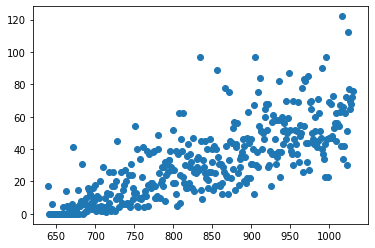

In [158]:
plt.scatter(df_3c.day, df4.Sorange)

In [159]:
window = 20

In [160]:
df_3c.Sorange.rolling(window).mean()

639       NaN
640       NaN
641       NaN
642       NaN
643       NaN
        ...  
1025    61.65
1026    62.35
1027    62.65
1028    64.00
1029    65.00
Name: Sorange, Length: 391, dtype: float64

In [161]:
reg_res = smf.ols('Sorange ~ day', data=df_3c).fit()
print(reg_res.summary())

                            OLS Regression Results                            
Dep. Variable:                Sorange   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     585.1
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           1.49e-79
Time:                        17:20:22   Log-Likelihood:                -1609.2
No. Observations:                 391   AIC:                             3222.
Df Residuals:                     389   BIC:                             3230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.0788      5.613    -18.365      0.0

In [162]:
display_side_by_side(pd.DataFrame({'day': range(1031, 1431)}),
    pd.DataFrame(reg_res.predict(pd.DataFrame({'day': range(1031, 1431)})).rolling(window).mean()))

,day
0,1031
1,1032
2,1033
3,1034
4,1035
5,1036
6,1037
7,1038
8,1039
9,1040


In [163]:
# The capacity left for Sorange
70 + 70 - (df.Calopeia.mean() + df_3c.Tyran.mean() + df_3c.Entworpe.mean())

67.534772676483

### Wrap-up

According to the analysis above, at around Day 1070, the capacity begins to fall short of the climbing demand from Sorange market. 